In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from  scipy import stats 
from scipy.optimize import minimize 

In [6]:
# generate data
x = np.linspace(-10, 30, 100)
# normally distributed residual
e = np.random.normal(10, 5, 100)
# generate ground truth
y = 10 + 4*x + e
df = pd.DataFrame({'x':x, 'y':y})
df.head() 

,x,y
0,-10.000000,-11.297410
1,-9.595960,-12.765661
2,-9.191919,-19.714133
3,-8.787879,-25.678086
4,-8.383838,-7.707773


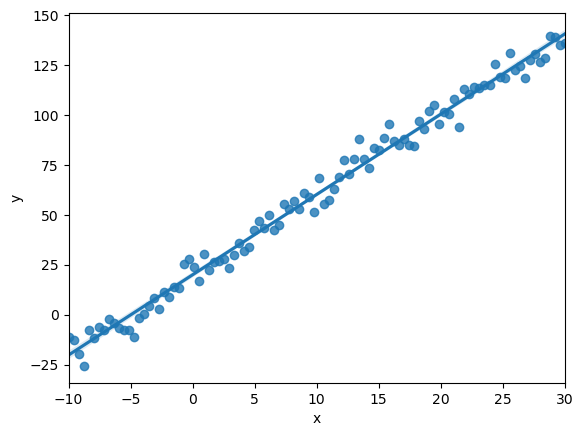

In [7]:
# visualize
sns.regplot(x='x', y='y', data = df)
plt.show()

### OLS method

In [8]:
# use parameters determied by OLS as benchmark to evaluate the MLE method
features = sm.add_constant(df.x)
model = sm.OLS(y, features).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     8106.
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           4.90e-96
Time:                        18:13:33   Log-Likelihood:                -305.95
No. Observations:                 100   AIC:                             615.9
Df Residuals:                      98   BIC:                             621.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.0251      0.686     29.176      0.000      18.663      21.387
x              4.0223      0.045     90.034      0.000       3.934       4.111
==============================================================================
Omnibus:                        0.124   Durbin-Watson:                   1.686
Prob(Omnibus):                  0.940   Jarque-Bera (JB):                0.246
Skew:                           0.074   Prob(JB):                        0.884
Kurtosis:                       2.808   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# get standard deviation
res = model.resid
standard_dev = np.std(res)
standard_dev

5.15810831692329

### MLE method

In [12]:
def MLE_norm(params):
    # extract params
    const,beta,std_dev = params
    # predict output
    pred = const+beta*x
    # get log likelihood for normal distriution
    LL = np.sum(stats.norm.logpdf(y, pred, std_dev))
    # get neg log likelihood
    neg_LL = -1*LL
    return neg_LL

In [16]:
# minimize neg_LL
# arguments: function, intial_guess_of_parameters, method
mle_model = minimize(MLE_norm,np.array([2,2,2]),method='L-BFGS-B')
mle_model

      fun: 305.9508440234921
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 5.68434142e-06,  0.00000000e+00, -2.27373677e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 228
      nit: 34
     njev: 57
   status: 0
  success: True
        x: array([20.02506958,  4.02225157,  5.15810544])

### conclusion

arrives at the final optimal solution after 34 iterations

estimate of MLE: 20.02506958,  4.02225157,  5.15810544

estimate of OLS: 20.0251, 4.0223, 5.15810831692329

they are pretty close